In [1]:
# This notebook contains the code for analyzing SNP calls from the Winter Dawn strawberry variety done for the first portion of HORT 503 Project 2
# Author: Matthew McGowan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axes
%matplotlib inline  

from IPython.display import Image
from IPython.core.display import HTML

In [3]:
# Importing the data as a pandas dataframe
SNP_data = pd.read_table("test_out.txt", sep = '\t', names = ['chromosome', 'position', 'ref_base', 'var_base', 'var_freq'])
SNP_data.head()
print(SNP_data.shape[0])

2039


Text(0.5,1,'SNP Position vs Frequency')

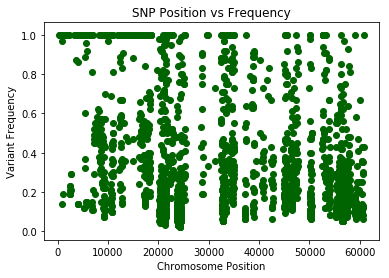

In [12]:
plt.show()
plt.scatter('position', 'var_freq', data = SNP_data, color = 'darkgreen')
plt.ylabel('Variant Frequency')
plt.xlabel('Chromosome Position')
plt.title("SNP Position vs Frequency")
# print(axes.get_xlim())

In [13]:
# This chart looks very messy. Because there are ~2000 data points, the scatter chart is not very readable
# Maybe it will be better to look at the average frequency using a sliding window...

# Defining a function to calculate a sliding average (both frequency and position)
def sliding_window(windowsize, SNP_data, output = None):
    windowsize = windowsize
    sliding_avg_freq = np.empty(SNP_data.shape[0]-windowsize, dtype = float)
    sliding_avg_pos = np.empty(SNP_data.shape[0]-windowsize, dtype = float)
    
    # Calculate the sliding average for both the position and the frequency
    for i in range(0, sliding_avg_freq.size):
        sliding_avg_freq[i] = np.mean(SNP_data['var_freq'][i:i+windowsize-1])
        sliding_avg_pos[i] = np.mean(SNP_data['position'][i:i+windowsize-1])    
    
    # Create a line plot of the calculations
    plt.plot(sliding_avg_pos, sliding_avg_freq, color = 'darkgreen')
    
    # Add labels
    plt.ylabel('Variant Frequency')
    plt.xlabel('Chromosome Position')
    plt.title("Sliding average of SNP position vs Frequency")
    
    # Add a text caption indicating windowsize in the upper right quadrant
    ax = plt.gca()
    plt.text(ax.get_xlim()[1] * 0.9, ax.get_ylim()[1] * 0.9, s = f"Windowsize: {windowsize}", horizontalalignment = 'right')
    
    # Save the plot to a .png file if a filename is provided
    if (output != None):
        plt.savefig(output, dpi = 300, format = 'png')
        
    plt.show()
    

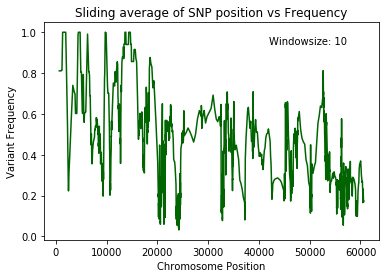

In [14]:
# Just as a starting point, looking at a windowsize of 10
sliding_window(10, SNP_data)

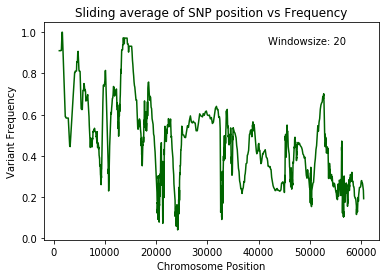

In [15]:
# Now to try increasing the window size to 20
sliding_window(20, SNP_data)

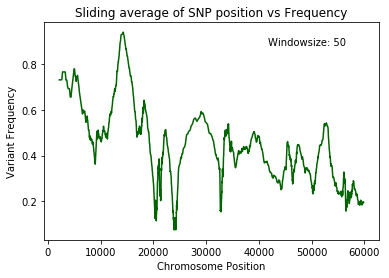

In [ ]:
# Now to try increasing the window size to 50
sliding_window(50, SNP_data)

In [ ]:
# Increasing even further to 100
sliding_window(100, SNP_data, "final_plot.png")

In [ ]:
# Based on these results, there seems to be a section between positions 10,000 and 20,000 that has a high frequency of variation.
# Overall, there seems to be a trend downwards from the beginning to the end of the chromosome
# There seem to be a few areas where variation is much lower (around 20k, 23k, and 33k)